## Task 04:

### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [155]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [156]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [157]:
# Loading the Dataset
df = pd.read_csv("twitter_training.csv")

In [158]:
display(df.head())

,ID,Brand,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [159]:
df.shape

(74682, 4)

In [160]:
df.columns

Index(['ID', 'Brand', 'Sentiment', 'Tweet'], dtype='object')

In [161]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
ID             0
Brand          0
Sentiment      0
Tweet        686
dtype: int64


In [162]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 2701


In [163]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [164]:
print("Missing values after cleaning:", df.isnull().sum())
print("Number of duplicate rows after cleaning:", df.duplicated().sum())

Missing values after cleaning: ID           0
Brand        0
Sentiment    0
Tweet        0
dtype: int64
Number of duplicate rows after cleaning: 0


In [165]:
brand_counts = df['Brand'].value_counts()

brand_percent = (brand_counts / len(df)) * 100

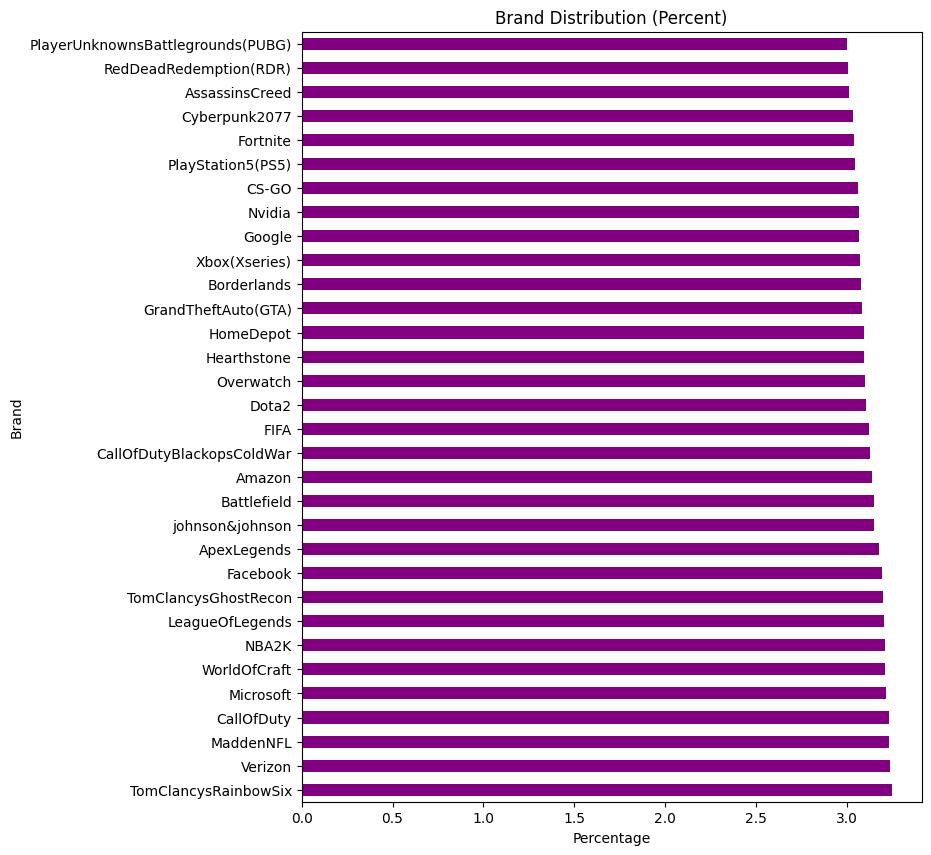

In [166]:
plt.figure(figsize=(8, 10))
brand_percent.plot(kind='barh', color='purple')
plt.title('Brand Distribution (Percent)')
plt.xlabel('Percentage')
plt.ylabel('Brand')
plt.show()

## Sentiment Analysis

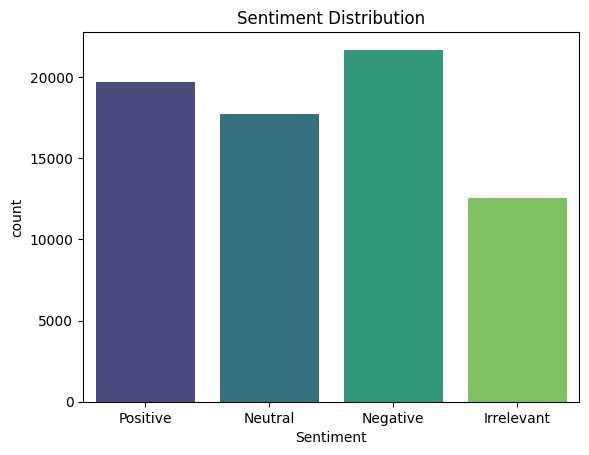

In [167]:
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

In [168]:
sentiment_counts = df['Sentiment'].value_counts()

print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
Sentiment
Negative      21698
Positive      19713
Neutral       17707
Irrelevant    12537
Name: count, dtype: int64


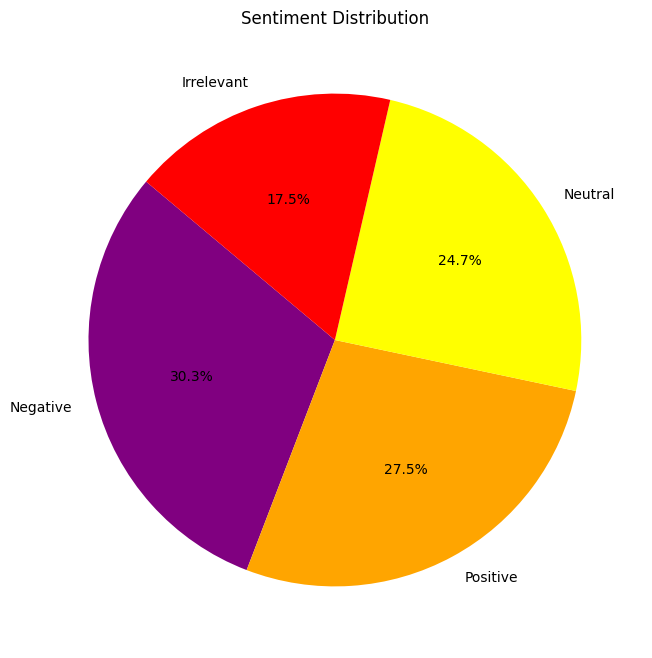

In [169]:
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['purple', 'orange', 'yellow', 'red'])
plt.title('Sentiment Distribution')
plt.show()

In [170]:
# Sentiment Distribution in Specific Brands
def plot_sentiment_distribution(brand):
    brand_data = df[df['Brand'] == brand]
    sentiment_counts = brand_data['Sentiment'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sentiment Distribution of Brand "{brand}"')
    plt.show()

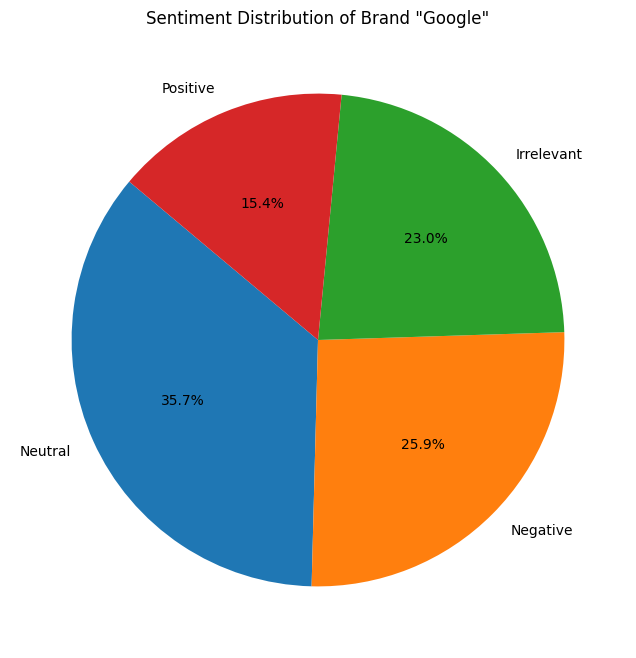

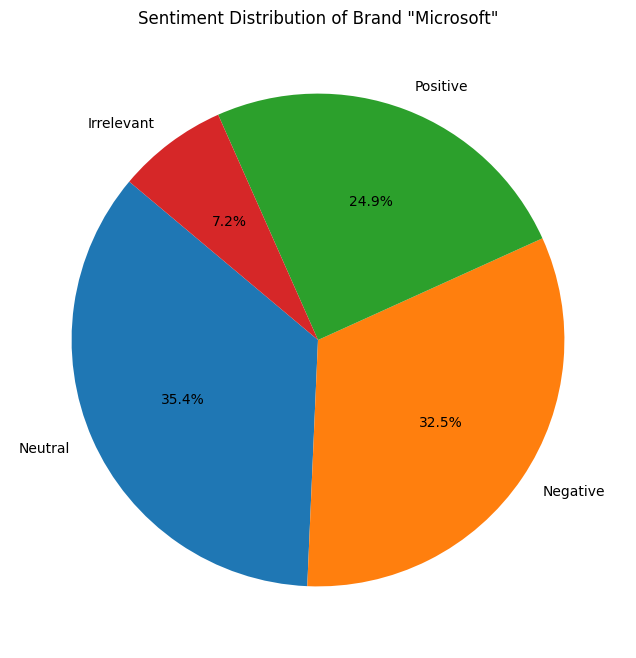

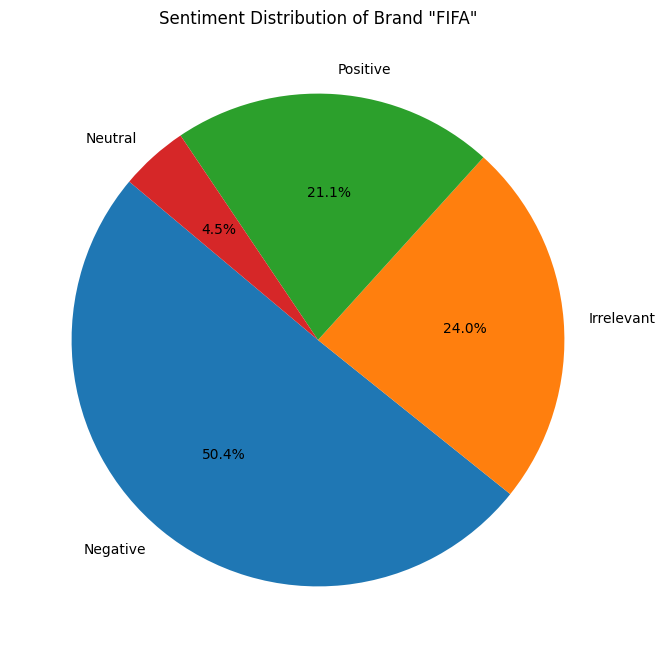

In [171]:
plot_sentiment_distribution('Google')
plot_sentiment_distribution('Microsoft')
plot_sentiment_distribution('FIFA')

In [172]:
df['msg_len'] = df['Tweet'].apply(len)
display(df.head())

,ID,Brand,Sentiment,Tweet,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57


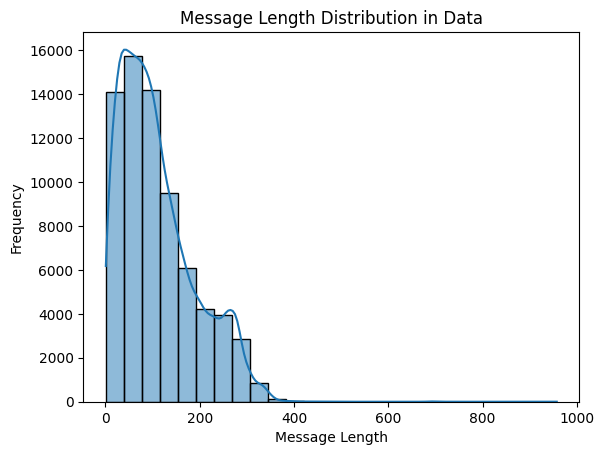

In [173]:
sns.histplot(df['msg_len'], bins=25, kde=True)
plt.title('Message Length Distribution in Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

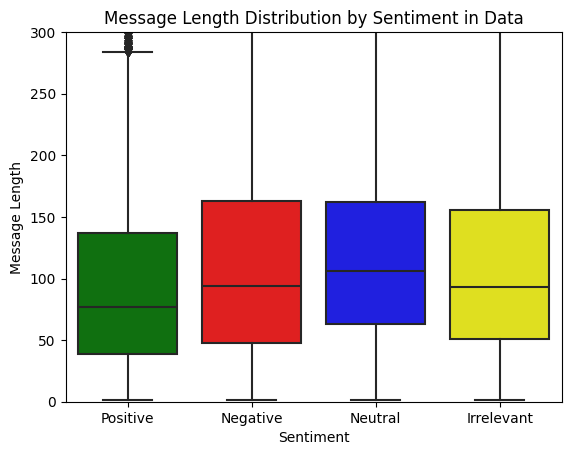

In [174]:
# Boxplot of message length distribution by sentiment
sns.boxplot(data=df, x='Sentiment', y='msg_len', palette=['green', 'red', 'blue', 'yellow'], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0, 300)
plt.show()

In [175]:
crosstab = pd.crosstab(df['Brand'], df['Sentiment'])

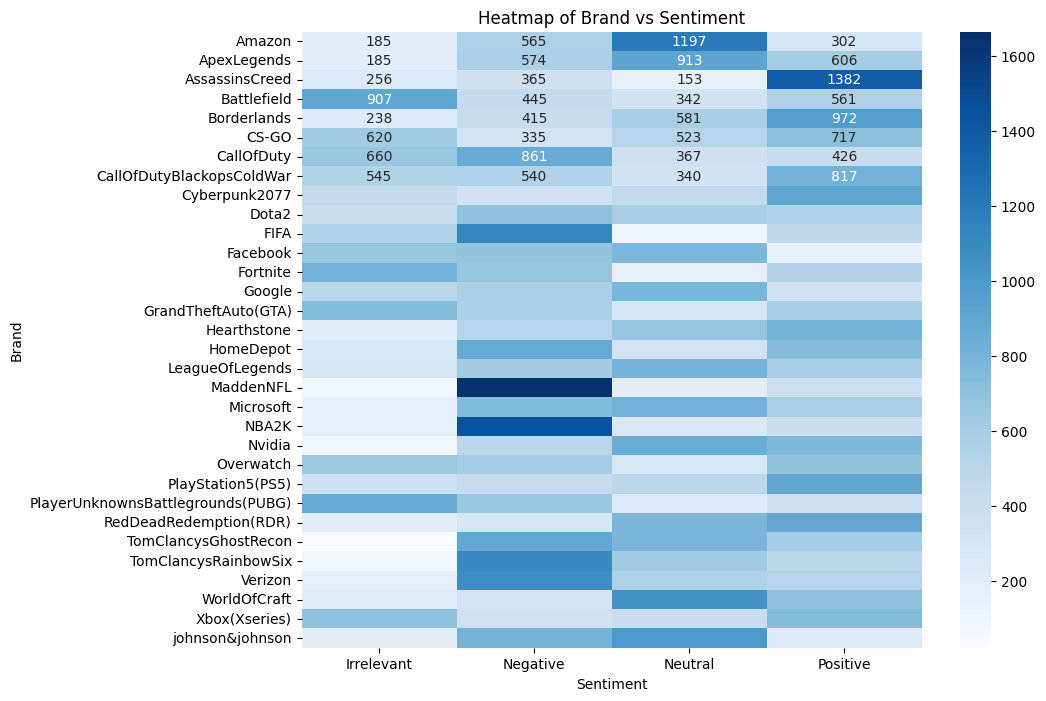

In [176]:
# Create a heatmap of the crosstab
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues")
plt.title('Heatmap of Brand vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Brand')
plt.show()

In [177]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [184]:
from collections import Counter
from nltk.corpus import stopwords

def print_words(sentiment, num_words=5):
    stop_words = set(stopwords.words('english'))
    additional_stop_words = {"i", "the", "like", "game"}  # add any additional stop words here
    stop_words.update(additional_stop_words)
    text = " ".join(tweet for tweet in df[df['Sentiment'] == sentiment]['Tweet'])
    words = text.split()
    meaningful_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    word_counts = Counter(meaningful_words)
    for word, count in word_counts.most_common(num_words):
        print(f"{word}: {count}")

for sentiment in df['Sentiment'].unique():
    print(f"\nWords in {sentiment} Tweets:")
    print_words(sentiment)


Words in Positive Tweets:
love: 1291
really: 1113
good: 1071
new: 927
play: 851

Words in Neutral Tweets:
Johnson: 1642
Amazon: 804
get: 731
com: 624
Facebook: 565

Words in Negative Tweets:
get: 1499
shit: 1052
fix: 1030
play: 997
still: 953

Words in Irrelevant Tweets:
player: 786
ban: 674
people: 619
one: 510
love: 505


In [181]:
# Word Clouds - Visualize the most common words for each sentiment
def plot_word_cloud(sentiment):
    text = " ".join(tweet for tweet in df[df['Sentiment'] == sentiment]['Tweet'])
    word_cloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()


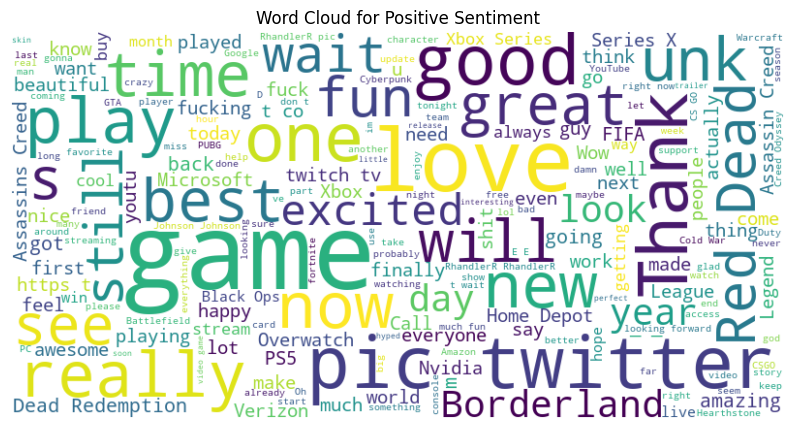

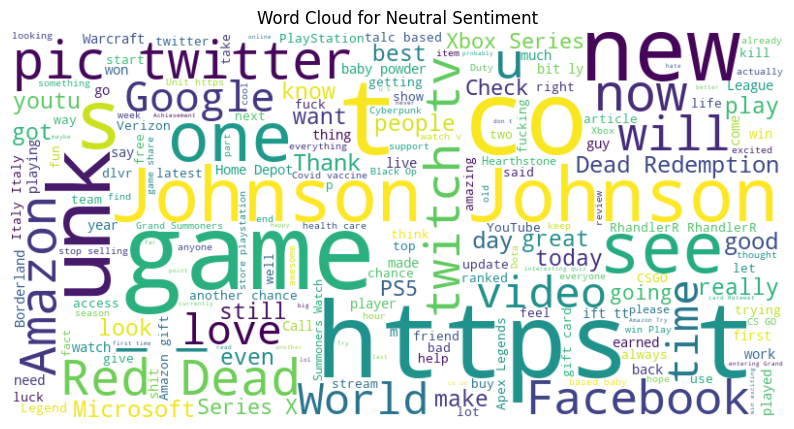

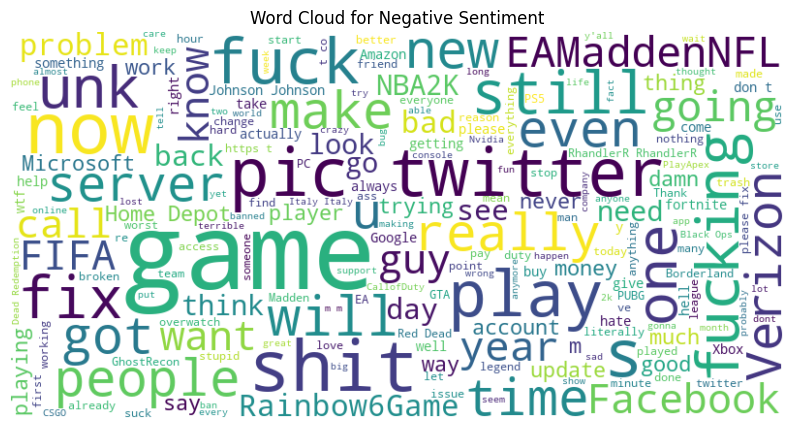

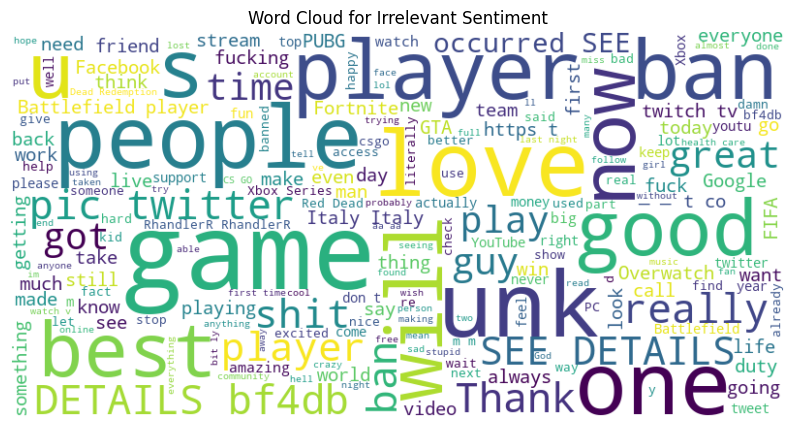

In [182]:
for sentiment in df['Sentiment'].unique():
    plot_word_cloud(sentiment)